# <a href="https://www.kaggle.com/competitions/labdata-churn-challenge-2020/"> Labdata Churn Challenge 2020 </a>
<hr>

## Competição para previsão de churn em uma empresa de telecomunicações.
Essa competição faz parte da disciplina de Machine Learning do Labdata-FIA. Seu objetivo é desenvolver um modelo que irá fornecer a melhor acurácia possível.<br> Não se limite apenas a isso, tente também encontrar as melhores variáveis explicativas e como elas explicam as predições do seu modelo.


## Os dados incluem os seguintes grupos de variáveis: <br>
* Churn: representa se um cliente cancelou ou não os serviços contratados <br>
* Serviços que cada cliente contratou - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies <br>
* Informações a respeito da conta do cliente – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges <br>
* Informações demográficas – gender, age range, and if they have partners and dependents

<hr>

## Importando Pacotes

In [62]:
import pandas as pd
import numpy as np
import joblib

from pycaret.classification import *

## Carregando os Dados

In [25]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [26]:
print(f'Quantidade de Linhas na base de Treino: {df_treino.shape[0]}\nQuantidade de Colunas na base de Treino: {df_treino.shape[1]}')
print(f'\nQuantidade de Linhas na base de Teste: {df_test.shape[0]}\nQuantidade de Colunas na base de Teste: {df_test.shape[1]}')

Quantidade de Linhas na base de Treino: 5634
Quantidade de Colunas na base de Treino: 21

Quantidade de Linhas na base de Teste: 1409
Quantidade de Colunas na base de Teste: 20


## Análise Exploratória

In [45]:
print(f'{df_train.dtypes}\n\n\n{df_test.dtypes}\n\n\nDados Faltantes:\n{df_train.isna().sum()}')

id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
Stre

## Tratamento

In [40]:
df_train['TotalCharges'], df_test['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce'), pd.to_numeric(df_test['TotalCharges'], errors='coerce')


In [44]:
print(f'{df_train.dtypes}\n\n\n{df_test.dtypes}')

id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


id                    int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
Stre

## Classificador

In [46]:
classificador = setup(data=df_train, target='Churn', fold_strategy='kfold')

,Description,Value
0,session_id,1571
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5634, 21)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


## Best Models

In [47]:
best_models = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8037,0.8538,0.5488,0.6629,0.5987,0.4705,0.4755,0.4010
ada,Ada Boost Classifier,0.8007,0.8490,0.5736,0.6451,0.6057,0.4731,0.4757,0.1870
lda,Linear Discriminant Analysis,0.7996,0.8428,0.5670,0.6446,0.6022,0.4691,0.4716,0.0330
ridge,Ridge Classifier,0.7991,0.0000,0.5319,0.6564,0.5864,0.4558,0.4610,0.0110
lr,Logistic Regression,0.7981,0.8446,0.5470,0.6479,0.5921,0.4592,0.4629,0.9430
rf,Random Forest Classifier,0.7976,0.8419,0.5201,0.6576,0.5795,0.4488,0.4551,0.3210
lightgbm,Light Gradient Boosting Machine,0.7971,0.8392,0.5298,0.6520,0.5831,0.4511,0.4564,0.0910
et,Extra Trees Classifier,0.7852,0.8250,0.5042,0.6238,0.5565,0.4170,0.4219,0.3260
xgboost,Extreme Gradient Boosting,0.7847,0.8282,0.5094,0.6222,0.5587,0.4182,0.4230,0.4690
nb,Naive Bayes,0.7520,0.8349,0.7826,0.5261,0.6281,0.4530,0.4737,0.0110


In [49]:
type(best_models[0])

sklearn.ensemble._gb.GradientBoostingClassifier

## Tuning the Model

In [51]:
model_classifier = tune_model(best_models[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8203,0.8743,0.5841,0.7333,0.6502,0.5314,0.5376
1,0.8228,0.8696,0.5591,0.6420,0.5977,0.4848,0.4867
2,0.7899,0.8469,0.5294,0.7000,0.6029,0.4637,0.4721
3,0.7843,0.8258,0.5243,0.6000,0.5596,0.4176,0.4193
4,0.8046,0.8476,0.5619,0.6556,0.6051,0.4763,0.4788
5,0.8249,0.8637,0.5957,0.6437,0.6188,0.5053,0.5060
6,0.7970,0.8605,0.5250,0.7326,0.6117,0.4792,0.4914
7,0.8173,0.8546,0.6296,0.6800,0.6538,0.5300,0.5307
8,0.8096,0.8330,0.6082,0.6146,0.6114,0.4854,0.4854


## Finalizing Model

In [52]:
model = finalize_model(model_classifier)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=1,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1571, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Confusion Matrix

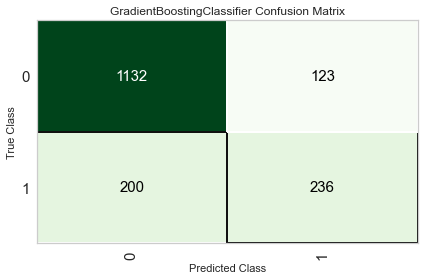

In [53]:
plot_model(model, plot="confusion_matrix")

## Predicting with New Data

In [57]:
predictions = predict_model(model, df_test)
predictions.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label,Score
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.30,0,0.9607
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,NaN,99.00,5969.30,0,0.8226
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1,0.6216
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0,0.9814
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.70,0,0.9901


## Saving the Data

In [69]:
df_churn = pd.DataFrame({'id': predictions['id'], 'Churn':predictions['Label'] })
df_churn.to_csv('./data/sample_submission.csv', index=False, encoding='utf-8')

df_churn.head()

,id,Churn
0,5027,0
1,1733,0
2,5384,1
3,6554,0
4,364,0


## Saving  Model

In [64]:
joblib.dump(model, './deploy/model.pkl')

['./deploy/model.pkl']